# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El proyecto sera orientado en descubrir que factores influyen en el precio de los vehiculos publicados en el sitio web, en el proyecto dependiendo de lo que podamos encontrar en la data, tendremos que evaluar los datos que nos han entregado, corregir las variables, valores nulos, datos atipicos, estudiar la correlacion que hay entre las columnas que existen en el dataframe, y verificar los indicadores que nos permiten evaluar correctamente la premisa principal que es saber que factores influyen en la variabilidad de los precios de los vehiculos publicados, luego de las correcciones de lugar estaremos explicando las hipotesis que nos llevaran a la conclusion de que cosas influyen en estos cambios de precio, para poder tener una idea mas clara de como ofrecer un producto interesante a los clientes que tenemos en la pagina web, como ejemplo podriamos ofrecer un premium fee para los clientes de vehiculos mas nuevos que quieran publicarlos de manera mas visible en la pagina.
</div>

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Cargar datos

In [2]:
# Carga el archivo de datos en un DataFrame

try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [3]:
# imprime la información general/resumida sobre el DataFrame

df.shape

(51525, 13)

In [4]:
# imprimir una muestra de datos

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Por aca podemos ver un DataFrame de 13 columnas el cual contiene la informacion necesaria para la investigacion, segun puedo observar hay varios detalles, valores ausentes `NaN`, la columna `model_year` usa valores con decimales, en vez de enteros, la columna `is_4wd`, deberia usar datos de tipo booleano.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Hay columnas con datos inapropiados en el DataFrame, las columnas con datos inapropiados puedo decir que estan en `model_year` y sus valores decimales, `is_4wd` con valores decimales en vez de booleanos.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Hay valores ausentes en algunas columnas, las columnas con mayor incidencia son `model_year`, `cylinders`, `odometer`, `paint_color` y `is_4wd`. A primera vista veo unos datos que no estan tan mal, donde Sí, debemos corregir unas cuantas cosas como los valores ausentes y los tipos de variables erroneas, tambien demostrar que los datos al ser tratados mantienen la coherencia y son viables para la investigacion.
</div>

### Conclusiones y siguientes pasos

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Entiendo que hay varias columnas que parecen normales, y a primera vista podrian usarse asi mismo, como son: `price`, `model`, `condition`, `fuel`, `transmission`, `type`, `date_posted` y `days_listed`, por otro lado tenemos las columnas con anomalias como: `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd`, que deben ser evaluadas y corregidas para poder utilizar su data en la investigacion.
</div>

## Tratar los valores ausentes (si hay)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Empezaremos por tratar los valores ausentes columna por columna, ya que cada una necesita un tratamiento ligeramente diferente, empecemos con `model_year`, `cylinders` y `odometer`.
</div>

In [5]:
# verificar la media y la mediana de 'model_year'

var_meds = df.groupby(['model'])['model_year'].transform('median')

In [6]:
# eliminar los valores ausentes de 'model_year'

df['model_year'].fillna(var_meds, inplace=True)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Luego de observar que la cantidad de valores Nulos de la columna `model_year` es solo un `7.02%` decidi que dado que la media para completar esos valores no nos conviene porque da un valor con decimales, la mediana si nos convendria, ya que su output es un numero entero y variaria poco los resultados finales a pesar de todo, solo habria que abordar el tipo de variable pasandola a `int64`, lo cual haremos un poco mas adelante.
</div>

In [7]:
# verificar la media y la mediana de 'cylinders'

var_meds = df.groupby(['model'])['cylinders'].transform('median')

In [8]:
# eliminar los valores ausentes de 'cylinders'

df['cylinders'].fillna(var_meds, inplace=True)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Dado que las observaciones en la columna `cylinders` van en la misma linea que la anterior, y la cantidad de valores Nulos de la columna es de un `10.20%`, y viendo que dado que la media para completar esos valores nos da un valor con decimales, la mediana seria la mejor opcion.
</div>

In [9]:
# verificar la media y la mediana de 'odometer'

var_meds = df.groupby(['condition'])['odometer'].transform('median')

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En el caso de la columna `odometer` es un poco mas complicado ya que la cantidad de valores nulos es un `15.31%` y esa cantidad de valores ya si entra en un rango que podria afectar los resultados de manera negativa si no se trata adecuadamente.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante `al comentario #2 del revisor`</b> <a class="tocSkip"></a>
Aca he corregido con la sugerencia que me ha hecho, he podido observar que los datos siguen teniendo el output que nos interesa, asi que todo en orden para seguir adelante.
</div>

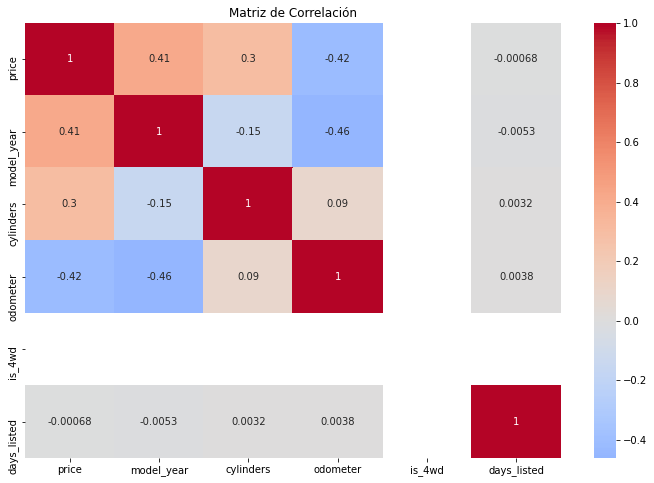

In [10]:
# Calcula la matriz de correlación

correlation_matrix = df.corr()

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como se puede observar en la matriz de correlacion `odometer` tiene una correlacion ligeramente negativa con `price` y `model_year`, lo que nos indica algo que es entendible, mientras mas alto el precio y mas nuevo el año, menor sera el millaje del vehiculo, podriamos decir que si estos 2 valores son cambiados bruscamente habria una incidencia negativa de mas de un `40%` en la columna `odometer`, pero como los valores incluidos en estas columnas eran lo suficientemente limpios, no habra mucho problema, ahora podriamos intentar el reemplazo de estos valores en `odometer` y ver que tanto afectaria nuestro grafico de correlacion, si no varia mucho, podriamos decir que logramos un reemplazo de valores nulos exitoso, ya que teniamos calculada la media y la mediana en esta columna previamente, vamos a sustituir los valores, esta vez, usaremos la mediana, ya que es la que menos varia los valores en general, y el resultado es menos problematico.
</div>

In [11]:
# eliminar los valores ausentes de 'odometer'

df['odometer'].fillna(var_meds, inplace=True)

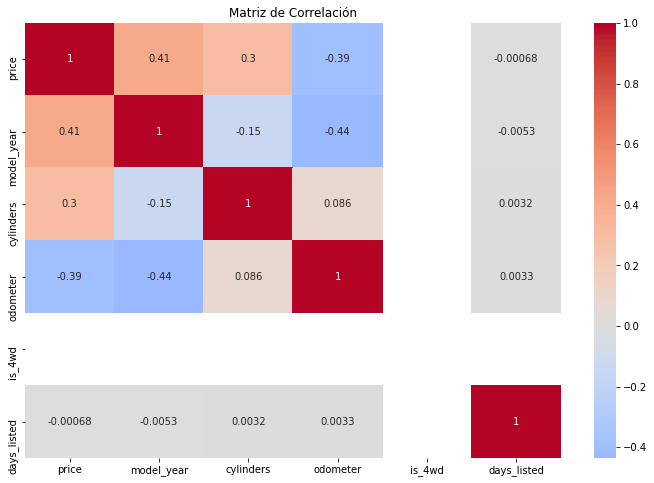

In [12]:
# Calcula la matriz de correlación

correlation_matrix = df.corr()

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos observar, haber cambiado los valores nulos por la mediana no tuvo una incidencia tan grande, que era lo que esperabamos, asi que estos valores los dejaremos asi, para poder continuar con la investigacion, si mas adelante apreciamos algun problema podriamos volver atras para corregir la resolucion de este problema.
</div>

In [13]:
# Rellena los valores nulos en 'paint_color' con unknown

df['paint_color'].fillna('unknown', inplace=True)

# Imprime el DataFrame con los valores nulos rellenados
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos apreciar los valores nulos faltantes fueron sustituidos en la columna `paint_color`, como no hay informacion suficiente para saber el color de un vehiculo, utilizamos el valor `unknown` para rellenar dichos valores nulos, asi que ya tenemos un dataframe libre de valores nulos, ahora si podremos evaluar adecuadamente la data.
</div>

In [14]:
# Constancia de que los valores nulos fueron abordados correctamente

df['odometer'].describe()

count     51525.000000
mean     115199.014508
std       60484.863376
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante `al comentario del revisor`</b> <a class="tocSkip"></a>
Como sugirio aborde el codigo con los codigos simplificados sugeridos y se hizo la sustitucion correspondiente en `paint_color` con el valor sugerido para los nulos, los calculos han sido llevados a cabo correctamente, asi que no variaron gran cosa las conclusiones.
</div>

## Corregir los tipos de datos

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Vamos a corregir en primera instancia el tipo de variable usado por `model_year` (deberia usar valores enteros como representacion de los años) y luego el tipo de variable para `is_4wd` (deberia usar una variable bool, para simplificar su entendimiento), por ultimo corregiremos `date_posted`, ya que esta usando una variable tipo object, lo cual no nos permitira trabajar con ella de manera normal (como una fecha real), entonces despues de cambiar el tipo de variable a tipo datetime, si podriamos usar la fecha como una fecha real, en esta ocasion hemos estado discriminando la columna `paint_color` porque necesita un tratamiento un tanto especial.
</div>

In [15]:
# cambiar tipo de variables a las variables correctas, que permitiran mejor evaluacion de la data

df['model_year'] = df['model_year'].astype('int64')
df['odometer'] = df['odometer'].astype('int64')
df['is_4wd'] = df['is_4wd'].fillna(False).astype(bool)

## Enriquecer datos

In [16]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio

df['date_posted'] = pd.to_datetime(df['date_posted'])

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como se puede observar los valores de `date_posted` no tienen hora, pero ya que no tenemos esa informacion y no se utilizara en la investigacion, es irrelevante, podemos continuar sin problemas.
</div>

In [17]:
# Agrega los años del vehículo cuando el anuncio se colocó

df['vehicle_age'] = df['date_posted'].dt.year - df['model_year'] + 1

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante `al comentario del revisor`</b> <a class="tocSkip"></a>
Por aca como se puede ver solventamos el fallo como me comento, le sumamos 1 a la edad de los vehiculos para tener la edad real de estos.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Este es un dato interesante ya que con el podremos saber la edad real del vehiculo que el cliente puede adquirir.
</div>

In [18]:
# Agrupa los datos por año del modelo y calcula el millaje promedio por año

df['average_mileage_by_year'] = (df['odometer'] / df['vehicle_age']).astype('int64')

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante `al comentario del revisor`</b> <a class="tocSkip"></a>
Me pude dar cuenta de mi error al comentarme sobre el, por aca corregimos el tema y simplificamos el codigo como sugirio, eso si, el calculo debe ser millaje / cantidad de años, para saber que cantidad de millas recorrio cada año, si dividimos el millaje entre el año del modelo del vehiculo, nos da unos resultados irreales, por ejemplo `145000` entre `2011` (que es nuestra primera fila en el dataframe) daria como resultado `72.10`, nadie recorre tan pocos kilometros al año, a diferencia, si lo dividimos entre `8` que es la edad del vehiculo, nos daria `18125` que si seria el resultado correcto, aparte, como me interesa que los valores no tengan decimales cambie el tipo de variable a `int64`, para esta nueva columna, ya que con numeros enteros el proceso se simplifica mas.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
La informacion del millaje promedio es super valiosa, ya que asi podremos saber que tanto abusaron del vehiculo antes de ponerlo en venta, eso tambien nos ayuda a saber que vehiculo tiene menor desgaste y esto podria llevar a un precio final mayor.
</div>

In [19]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

# Define el mapeo de valores de cadena a valores numéricos
condition_mapping = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}

# Reemplaza los valores de la columna 'condition' con los valores numéricos
df['condition'] = df['condition'].replace(condition_mapping)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Al cambiar los valores en `condition`, por estos numericos nos simplificaremos la evaluacion, ya que los valores numericos son mas faciles de evaluar con miras al estudio de las correlaciones entre columna y demas.
</div>

## Comprobar datos limpios

In [20]:
# imprime la información general/resumida sobre el DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   price                    51525 non-null  int64         
 1   model_year               51525 non-null  int64         
 2   model                    51525 non-null  object        
 3   condition                51525 non-null  int64         
 4   cylinders                51525 non-null  float64       
 5   fuel                     51525 non-null  object        
 6   odometer                 51525 non-null  int64         
 7   transmission             51525 non-null  object        
 8   type                     51525 non-null  object        
 9   paint_color              51525 non-null  object        
 10  is_4wd                   51525 non-null  bool          
 11  date_posted              51525 non-null  datetime64[ns]
 12  days_listed              51525 n

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos observar ya los datos estan limpios y listos para ser utilizados en la investigacion, todas las columnas tienen la misma cantidad de filas, sin datos ausentes ya podemos proceder a abordar la investigacion en torno a los datos atipicos, para poder llegar a unas conclusiones mas certeras.
</div>

In [21]:
# imprimir una muestra de datos

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,average_mileage_by_year
0,9400,2011,bmw x5,2,6.0,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,8,18125
1,25500,2011,ford f-150,2,6.0,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,11088
2,5500,2013,hyundai sonata,4,4.0,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,15714
3,1500,2003,ford f-150,1,8.0,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,17,10683
4,14900,2017,chrysler 200,3,4.0,gas,80903,automatic,sedan,black,False,2019-04-02,28,3,26967
5,14990,2014,chrysler 300,3,6.0,gas,57954,automatic,sedan,black,True,2018-06-20,15,5,11590
6,12990,2015,toyota camry,3,4.0,gas,79212,automatic,sedan,white,False,2018-12-27,73,4,19803
7,15990,2013,honda pilot,3,6.0,gas,109473,automatic,SUV,black,True,2019-01-07,68,7,15639
8,11500,2012,kia sorento,3,4.0,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,7,14882
9,9200,2008,honda pilot,3,6.0,gas,147191,automatic,SUV,blue,True,2019-02-15,17,12,12265


## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En esta seccion vamos a abordar los datos atipicos, visualizaremos las columnas que tienen mayor relevancia en cuanto a lo que nos interesa de la investigacion, y basados en los histogramas que obtengamos de ellas entonces discriminaremos los valores atipicos.
</div>

In [22]:
# Función para generar histograma con análisis de valores atípicos

def analyze_parameter(column_name, kde=True):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column_name, kde=kde)
    plt.title(f'Histograma de {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frecuencia')
    plt.show()

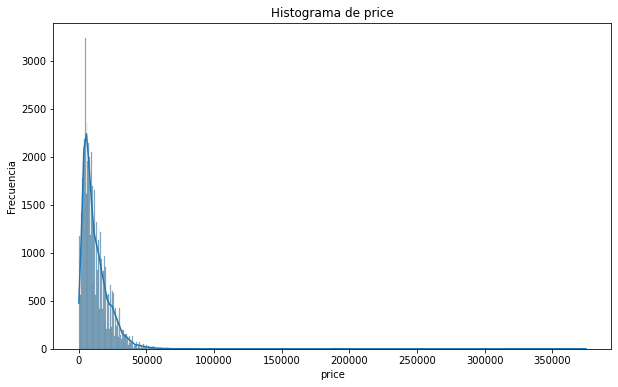

In [23]:
# Llamada a la función para analizar la columna 'price'

analyze_parameter('price')

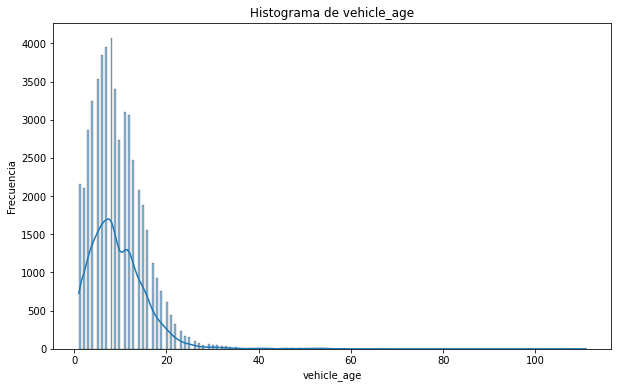

In [24]:
# Llamada a la función para analizar la columna 'vehicle_age'

analyze_parameter('vehicle_age')

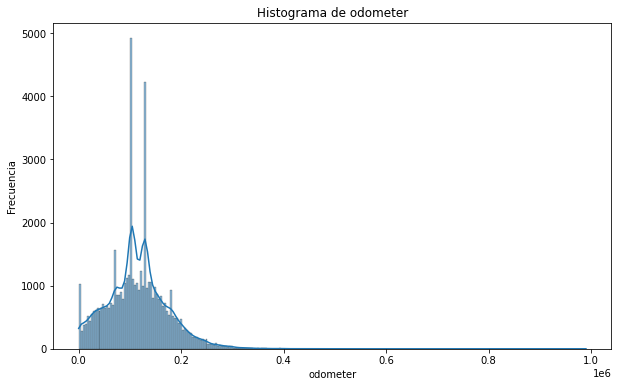

In [25]:
# Llamada a la función para analizar la columna 'odometer'

analyze_parameter('odometer')

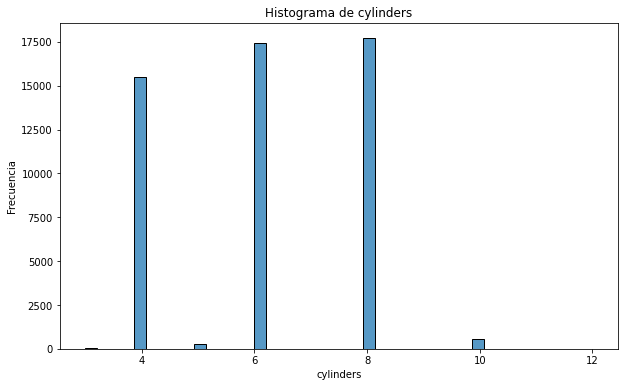

In [26]:
# Llamada a la función para analizar la columna 'cylinders'

analyze_parameter('cylinders', kde=False)

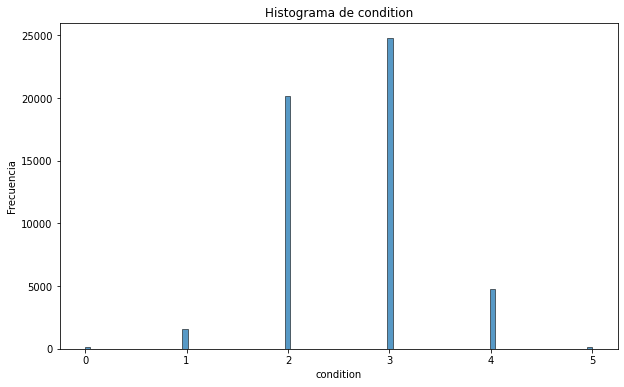

In [27]:
# Llamada a la función para analizar la columna 'condition'

analyze_parameter('condition', kde=False)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante `al comentario del revisor`</b> <a class="tocSkip"></a>
Aca como se puede apreciar, para solventar el problema, utilizamos una manera flexible del parametro `kde`, para asi no tener que repetir mucho codigo, de esta manera solo a los graficos que no lo necesiten se le agrega el parametro y asi podemos utilizar el `kde` en los demas para apreciar de mejor manera la tendencia que se nos muestra utilizandolo, y asi evitar perder esta herramienta que nos provee un mayor entendimiento del grafico.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos observar en los graficos, cerca del `10%` de la data tiene una tendencia atipica, esto lo veremos en la parte siguiente donde determinaremos cuales valores seran nuestro target como valores atipicos, para discriminarlos de forma efectiva y poder seguir adelante con la investigacion.
</div>

## Estudiar y tratar valores atípicos

In [28]:
# Determina los límites inferiores para valores atípicos

def calculate_lower_bound(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    return lower_bound

lower_bound_price = calculate_lower_bound(df['price'])
lower_bound_vehicle_age = calculate_lower_bound(df['vehicle_age'])
lower_bound_odometer = calculate_lower_bound(df['odometer'])
lower_bound_cylinders = calculate_lower_bound(df['cylinders'])
lower_bound_condition = calculate_lower_bound(df['condition'])

print("Límites inferiores para valores atípicos:")
print("Price:", lower_bound_price)
print("Vehicle Age:", lower_bound_vehicle_age)
print("Odometer:", lower_bound_odometer)
print("Cylinders:", lower_bound_cylinders)
print("Condition:", lower_bound_condition)

Límites inferiores para valores atípicos:
Price: -12758.5
Vehicle Age: -7.0
Odometer: -32561.5
Cylinders: -2.0
Condition: 0.5


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos observar que hay valores atipicos bien marcados en los limites inferiores de la columna `price` y `odometer`, aparte tambien las columnas `vehicle_age` y `cylinders` tienen algunos de esos valores incoherentes, al igual que `condition` aunque esta ultima en menor medida.
</div>

In [29]:
# Determinar los límites superiores para valores atípicos

def calculate_upper_bound(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    return upper_bound

upper_bound_price = calculate_upper_bound(df['price'])
upper_bound_vehicle_age = calculate_upper_bound(df['vehicle_age'])
upper_bound_odometer = calculate_upper_bound(df['odometer'])
upper_bound_cylinders = calculate_upper_bound(df['cylinders'])
upper_bound_condition = calculate_upper_bound(df['condition'])

print("Límites superiores para valores atípicos:")
print("Price:", upper_bound_price)
print("Vehicle Age:", upper_bound_vehicle_age)
print("Odometer:", upper_bound_odometer)
print("Cylinders:", upper_bound_cylinders)
print("Condition:", upper_bound_condition)

Límites superiores para valores atípicos:
Price: 34597.5
Vehicle Age: 25.0
Odometer: 256050.5
Cylinders: 14.0
Condition: 4.5


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Igual por aca, podemos observar que hay valores atipicos en los limites superiores de la columna `price` y `odometer`, aparte tambien las columnas `vehicle_age` y `cylinders` tienen algunos de esos valores atipicos, al igual que `condition` aunque esta ultima en menor medida, igual que la anterior vez.
</div>

In [30]:
# Almacena los datos sin valores atípicos en un DataFrame separado

filtered_df = df[
    (df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price) &
    (df['vehicle_age'] >= lower_bound_vehicle_age) & (df['vehicle_age'] <= upper_bound_vehicle_age) &
    (df['odometer'] >= lower_bound_odometer) & (df['odometer'] <= upper_bound_odometer) &
    (df['cylinders'] >= lower_bound_cylinders) & (df['cylinders'] <= upper_bound_cylinders) &
    (df['condition'] >= lower_bound_condition) & (df['condition'] <= upper_bound_condition)
]

# Mostrar información general del nuevo DataFrame sin valores atípicos
print("Información general del DataFrame sin valores atípicos:")
filtered_df.info()

Información general del DataFrame sin valores atípicos:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48092 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   price                    48092 non-null  int64         
 1   model_year               48092 non-null  int64         
 2   model                    48092 non-null  object        
 3   condition                48092 non-null  int64         
 4   cylinders                48092 non-null  float64       
 5   fuel                     48092 non-null  object        
 6   odometer                 48092 non-null  int64         
 7   transmission             48092 non-null  object        
 8   type                     48092 non-null  object        
 9   paint_color              48092 non-null  object        
 10  is_4wd                   48092 non-null  bool          
 11  date_posted              48092 non-nu

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante `al comentario del revisor`</b> <a class="tocSkip"></a>
Ciertamente es mas simple tomar las variables directamente para que se hagan las operaciones sin tener que hacer malabares, aca esta solventado el problema como sugirio, utilizando las variables directamente.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aqui ya hemos procedido a mitigar el inconveniente de los valores atipicos, nos hemos quedado con el `93.33%` de la data del dataframe original para la investigacion, lo que indica que la discriminacion de estos valores no va a influir de manera negativa con el trabajo que debe realizarse.
</div>

In [31]:
# Mostrar las primeras filas del DataFrame filtrado

filtered_df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,average_mileage_by_year
0,9400,2011,bmw x5,2,6.0,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,8,18125
1,25500,2011,ford f-150,2,6.0,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,11088
2,5500,2013,hyundai sonata,4,4.0,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,15714
3,1500,2003,ford f-150,1,8.0,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,17,10683
4,14900,2017,chrysler 200,3,4.0,gas,80903,automatic,sedan,black,False,2019-04-02,28,3,26967
5,14990,2014,chrysler 300,3,6.0,gas,57954,automatic,sedan,black,True,2018-06-20,15,5,11590
6,12990,2015,toyota camry,3,4.0,gas,79212,automatic,sedan,white,False,2018-12-27,73,4,19803
7,15990,2013,honda pilot,3,6.0,gas,109473,automatic,SUV,black,True,2019-01-07,68,7,15639
8,11500,2012,kia sorento,3,4.0,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,7,14882
9,9200,2008,honda pilot,3,6.0,gas,147191,automatic,SUV,blue,True,2019-02-15,17,12,12265


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca podemos apreciar una muestra del dataframe filtrado, despues de la discriminacion de los valores atipicos.
</div>

## Estudiar parámetros principales sin valores atípicos

In [32]:
# Definir función para crear histogramas

def create_histogram(column_name, title, kde=True):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=filtered_df, x=column_name, kde=kde)
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Frecuencia')
    plt.show()

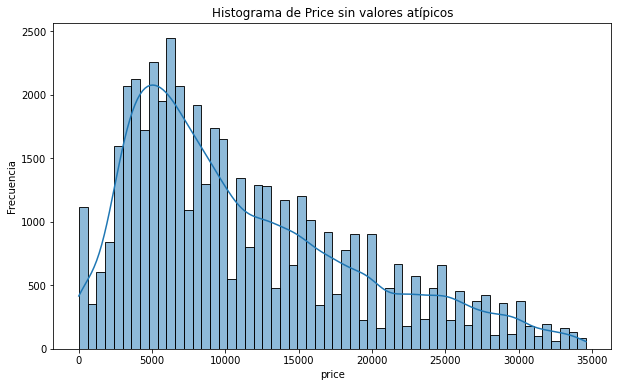

In [33]:
# Crear histograma para 'price'

create_histogram('price', 'Histograma de Price sin valores atípicos')

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Comparando el nuevo histograma de `price`, la data parece tener un mayor nivel de relevancia, ya que es mas entendible y amigable para los no entendidos, se aprecia la misma tendencia a tener mas publicaciones con precios alrededor de los 5000, lo cual nos permite saber que acertamos al discriminar los valores que sacamos del dataframe sin filtrar.
</div>

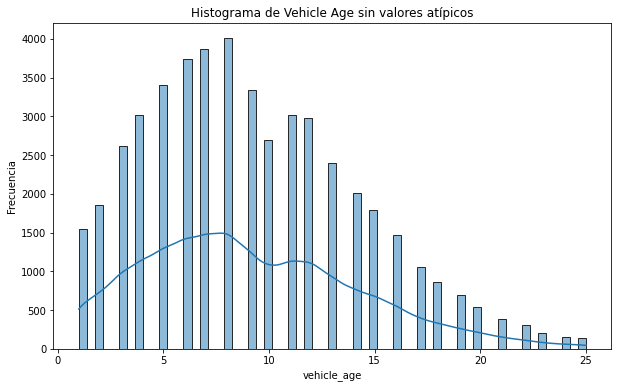

In [34]:
# Crear histograma para 'vehicle_age'

create_histogram('vehicle_age', 'Histograma de Vehicle Age sin valores atípicos')

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En este nuevo grafico de `vehicle_age` podemos observar la misma tendencia a publicaciones de vehiculos con edades que rondan los `7` años, lo cual es lo mismo que se observaba en el anterior grafico, pero la verdad era poco entendible, si no se hubiera hecho la discriminacion de valores atipicos, ese anterior grafico nos habria servido de poca cosa.
</div>

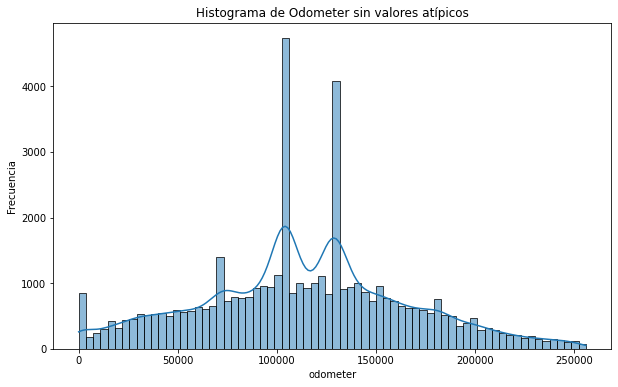

In [35]:
# Crear histograma para 'odometer'

create_histogram('odometer', 'Histograma de Odometer sin valores atípicos')

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En esta nueva iteracion de la columna `odometer`, podemos apreciar tendencias iguales, con mejor visibilidad, mas entendibles, al igual que los demas graficos y con datos utiles y listos para una investigacion mas profunda, como podemos ver la tendencia sigue siendo a valores que rondan las `120000` millas, lo cual nos permite tener en cuenta este tipo de valores a la hora de nuestras conclusiones preliminares.
</div>

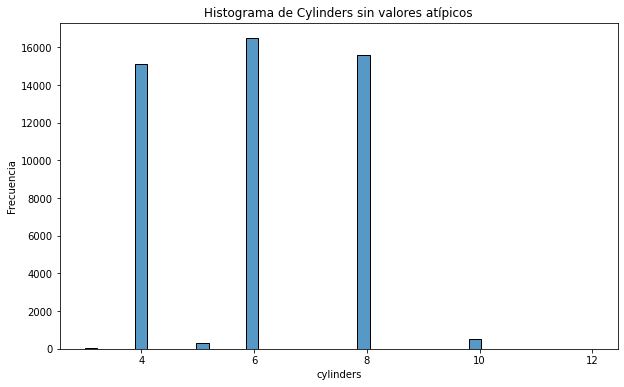

In [36]:
# Crear histograma para 'cylinders'

create_histogram('cylinders', 'Histograma de Cylinders sin valores atípicos', kde=False)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El grafico de esta columna `cylinders`, no tiene mucho de donde quitarle, asi que basicamente es el mismo que vimos con valores atipicos, pero sin los valores atipicos que tenia, podemos ver que la mayor cantidad de publicaciones que tienen una cilindrada especifica se centran en los `6` cilindros.
</div>

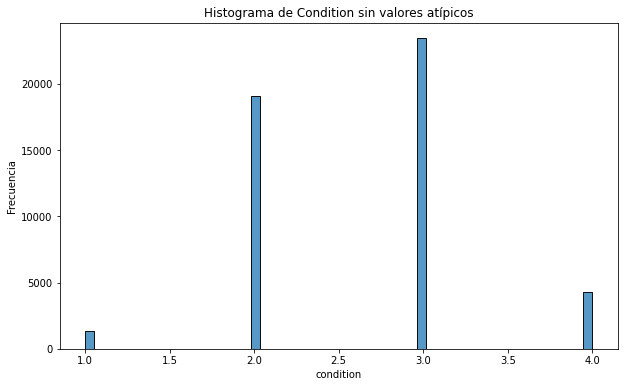

In [37]:
# Crear histograma para 'condition'

create_histogram('condition', 'Histograma de Condition sin valores atípicos', kde=False)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante `al comentario del revisor`</b> <a class="tocSkip"></a>
Por aca repetimos el mismo tratamiento de los graficos anteriores para solventar el problema con el parametro `kde`, utilizamos una manera flexible del parametro, para asi solo llamarlo cuando es necesario deshabilitarlo y asi podemos utilizar el `kde` en los demas para apreciar de mejor manera la tendencia que se nos muestra utilizandolo, y asi evitar perder esta herramienta que nos provee de mayor entendimiento del grafico.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En este grafico de la columna `condition` podemos ver la misma tendencia del anterior pero con la data ya limpia, la mayor cantidad de publicaciones se centran en vehiculos en condicion `3` que seria `excellent` y como segundo lugar estan los que estan en `good`.
</div>

## Periodo de colocación de los anuncios

Media de días listados: 39.55475982532751
Mediana de días listados: 33.0


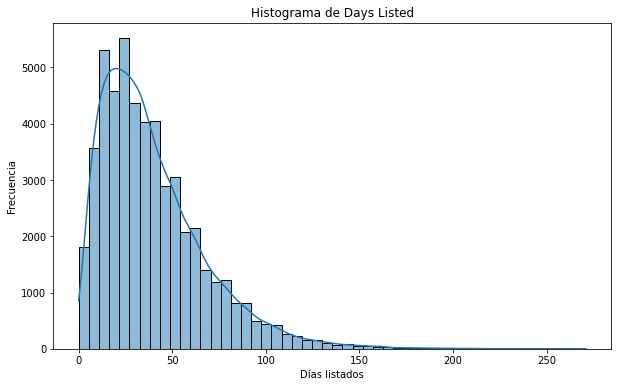

In [38]:
# Calcular la media y la mediana de days_listed

mean_days_listed = df['days_listed'].mean()
median_days_listed = df['days_listed'].median()

print("Media de días listados:", mean_days_listed)
print("Mediana de días listados:", median_days_listed)

# Crear un histograma de days_listed
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='days_listed', bins=50, kde=True)
plt.title('Histograma de Days Listed')
plt.xlabel('Días listados')
plt.ylabel('Frecuencia')
plt.show()

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos observar el tiempo habitual de colocacion de un anuncio ronda los `33` a `39` dias, segun la media y la mediana respectivamente.
</div>

In [39]:
# Definir umbrales para anuncios eliminados rápidamente y anuncios de duración anormalmente larga

quick_removal_threshold = 10
long_duration_threshold = 60

# Filtrar anuncios eliminados rápidamente y con duración anormalmente larga
quick_removal_ads = df[df['days_listed'] < quick_removal_threshold]
long_duration_ads = df[df['days_listed'] > long_duration_threshold]

# Imprimir la cantidad de anuncios eliminados rápidamente y de duración anormalmente larga
print("Cantidad de anuncios eliminados rápidamente:", len(quick_removal_ads))
print("Cantidad de anuncios de duración anormalmente larga:", len(long_duration_ads))

Cantidad de anuncios eliminados rápidamente: 4586
Cantidad de anuncios de duración anormalmente larga: 9891


In [40]:
# Obtener los modelos, edades y condiciones de vehículos que fueron eliminados rápidamente

quick_removal_info = quick_removal_ads[['model', 'vehicle_age', 'condition']]

# Obtener los modelos, edades y condiciones de vehículos con duración anormalmente larga
long_duration_info = long_duration_ads[['model', 'vehicle_age', 'condition']]

# Mostrar los modelos, edades y condiciones con mayor incidencia de eliminación rápida
print("Modelos, edades y condiciones con mayor incidencia de eliminación rápida:")
print(quick_removal_info.head(10))

# Mostrar los modelos, edades y condiciones con mayor incidencia de duración anormalmente larga
print("Modelos, edades y condiciones con mayor incidencia de duración anormalmente larga:")
print(long_duration_info.head(10))

Modelos, edades y condiciones con mayor incidencia de eliminación rápida:
                             model  vehicle_age  condition
3                       ford f-150           17          1
21                     toyota rav4           12          2
32                   nissan altima            4          4
39                      ford f-150           11          2
59               toyota highlander           13          2
73      jeep grand cherokee laredo           25          2
75                 chevrolet tahoe           14          3
84                 hyundai elantra            6          4
114    nissan frontier crew cab sv            1          2
120  chevrolet silverado 1500 crew            2          2
Modelos, edades y condiciones con mayor incidencia de duración anormalmente larga:
                  model  vehicle_age  condition
2        hyundai sonata            7          4
6          toyota camry            4          3
7           honda pilot            7          3
15

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca podemos observar que los anuncios de los vehiculos que se eliminaron de manera mas rapida fueron vehiculos con poco tiempo de uso, y los que estuvieron publicados por mayor tiempo en la pagina web fueron vehiculos con mas de 6 años de uso y `fair` en la columna `condition`, asi que podemos decir que los vehiculos que fueron mas abusados tuvieron peor salida sin mucha variacion en la cantidad de tiempo de uso.
</div>

## Precio promedio por cada tipo de vehículo

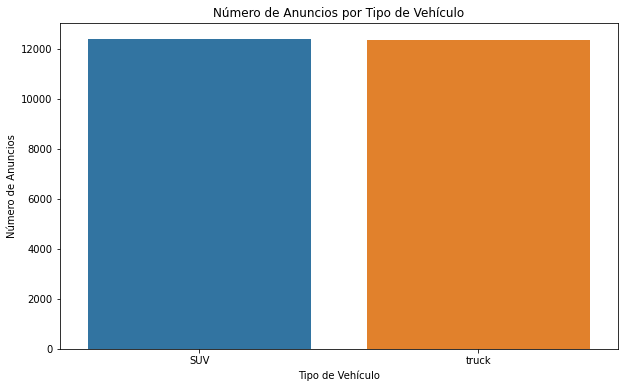

Información sobre el número de anuncios y el precio promedio por tipo de vehículo:
           type         price  num_ads
0           SUV  11149.400000    12405
1           bus  17135.666667       24
2   convertible  14575.881166      446
3         coupe  14353.442901     2303
4     hatchback   6868.513849     1047
5      mini-van   8193.177433     1161
6       offroad  14292.294393      214
7         other  10989.714844      256
8        pickup  16057.410418     6988
9         sedan   6965.358647    12154
10        truck  16734.894924    12353
11          van  10546.941548      633
12        wagon   9088.134328     1541


In [41]:
# Calcular el número de anuncios y el precio promedio por tipo de vehículo

vehicle_type_stats = df.groupby('type').agg({'price': 'mean', 'model': 'count'}).reset_index()
vehicle_type_stats.rename(columns={'model': 'num_ads'}, inplace=True)

# Seleccionar los dos tipos con el mayor número de anuncios
top_vehicle_types = vehicle_type_stats.nlargest(2, 'num_ads')

# Graficar la dependencia de la cantidad de anuncios en cada tipo de vehículo
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='num_ads', data=top_vehicle_types)
plt.title('Número de Anuncios por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Anuncios')
plt.show()

# Mostrar la información sobre el número de anuncios y el precio promedio por tipo de vehículo
print("Información sobre el número de anuncios y el precio promedio por tipo de vehículo:")
print(vehicle_type_stats)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Los vehiculo con mayor precio por tipo fueron los `SUV` y `truck`, como podemos observar el valor promedio y numero de ads de estos es la superior entre las demas.
</div>

## Factores de precio

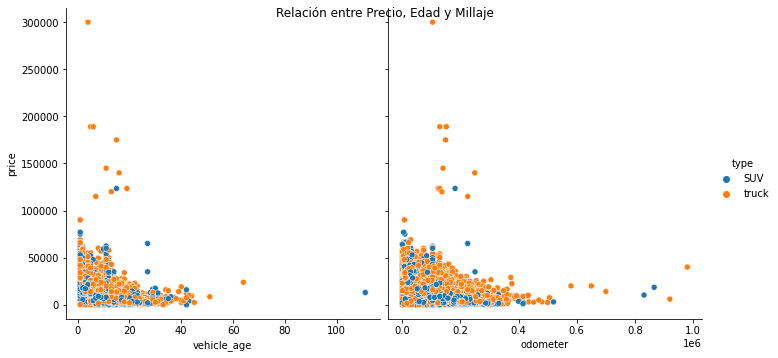

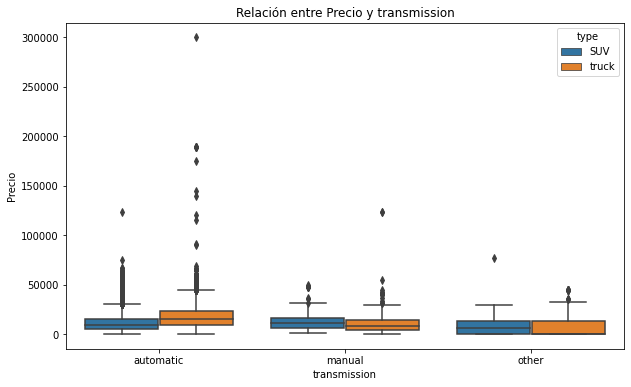

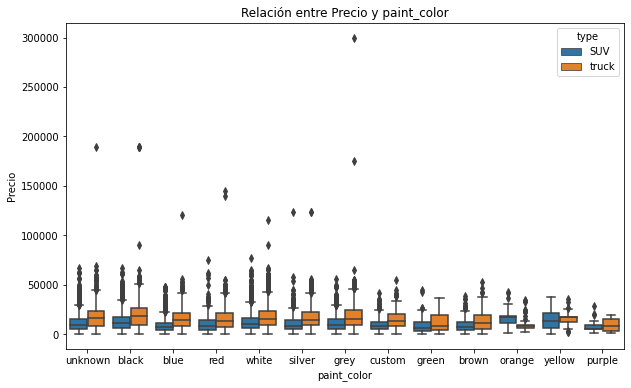

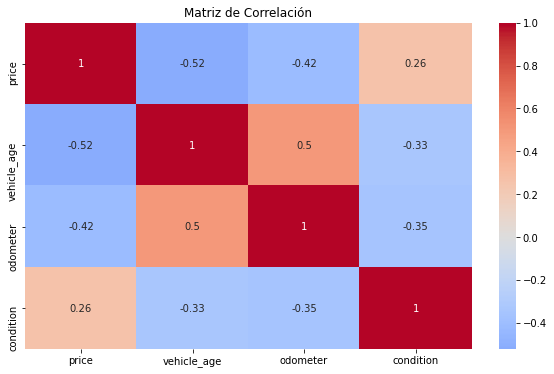

                price  vehicle_age  odometer  condition
price        1.000000    -0.521610 -0.417956   0.259821
vehicle_age -0.521610     1.000000  0.503983  -0.333696
odometer    -0.417956     0.503983  1.000000  -0.352598
condition    0.259821    -0.333696 -0.352598   1.000000


In [42]:
# Filtrar el DataFrame para los tipos de vehículos más populares

popular_vehicle_types = top_vehicle_types['type'].tolist()
filtered_df = df[df['type'].isin(popular_vehicle_types)]

# Crear un DataFrame con las variables seleccionadas
selected_columns = ['type', 'price', 'vehicle_age', 'odometer', 'condition', 'transmission', 'paint_color']
selected_df = filtered_df[selected_columns]

# Filtrar las categorías con al menos 50 anuncios para las variables categóricas
categorical_vars = ['transmission', 'paint_color']
for var in categorical_vars:
    counts = selected_df[var].value_counts()
    selected_categories = counts[counts >= 50].index
    selected_df = selected_df[selected_df[var].isin(selected_categories)]

# Crear un gráfico de dispersión para las variables numéricas
numeric_vars = ['vehicle_age', 'odometer']
sns.pairplot(selected_df, x_vars=numeric_vars, y_vars='price', hue='type', height=5)
plt.suptitle('Relación entre Precio, Edad y Millaje')
plt.show()

# Crear gráficos de caja y bigotes para las variables categóricas
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=selected_df, x=var, y='price', hue='type')
    plt.title(f'Relación entre Precio y {var}')
    plt.xlabel(var)
    plt.ylabel('Precio')
    plt.show()

# Calcular la matriz de correlación y mostrar un heatmap
correlation_matrix = selected_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()
print(correlation_matrix)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En esta parte podemos ver la incidencia de las diferentes variables en el precio de los vehiculos, por tipo, año, millaje, condicion, color y transmision, podemos concluir que los vehiculos tipo `SUV` de color `negro`, `amarillo` y `naranja`, en transmision `manual`, o `TRUCK` de color `desconocido`, `negro` y `gris`, en transmision `automatica` ambos tipos de menos de `7` años y que tengan menos de `50000` millas son los vehiculos con mayores precios de nuestro dataframe, el valor de estos no depende de una sola variable en especifico, si no del conjunto en general es lo que se puede observar con una relacion no demasiado fuerte entre todas las variables ya mencionadas, pero a pesar de ello la relacion es evidente.
</div>

## Conclusión general

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante `Conclusion Corregida`</b> <a class="tocSkip"></a>
Como conclusiones podemos decir que la investigacion arrojo unos detalles interesantes, como el hecho de que una sola variable no determina el precio de un vehiculo, si no que esto se determina con un conjunto de valores los cuales son el `tipo`, `color`, `transmision`, `edad` y `millaje`, este conjunto nos arroja la informacion necesaria para saber que le da o quita valor a un vehiculo, como pudimos demostrar en los graficos contenidos en la investigacion, en el proceso gracias al procesado de los datos pude observar con detenimiento la fragil relacion que hay entre cada columna y el porque debia procesar los datos de la manera que lo hice, para asegurar que la investigacion fuera lo menos imparcial y conclusiva posible, como podemos ver se discrimino poca data en el proceso solo se perdio un `6.67%` de la data original, a la vez que se mejoro la que ya teniamos disponible, para poder lograr el cometido. Hablemos de los valores ausentes y atipicos con que nos encontramos en el dataframe que nos entregaron, estos valores que pudimos encontrar en el dataframe simplemente parecen un grupo de errores que se acumularon en la captura de los datos, algo imposible de conocer por mi en el sentido de que no tengo acceso al equipo que se dedico a la captura para hacerles las preguntas correspondientes sobre estos errores, en el caso de los valores atipicos parecian mas un tipo de error de conversion de los datos, ya que habia bastantes datos en negativo en `price` y `odometer` principalmente, para solucionarlo, ya que no era una gran cantidad de data, como se puede observar, simplemente los deje fuera, la discriminacion fue bastante efectiva, ya que los resultados no fueron influenciados de manera negativa y las conclusiones fueron mas que evidentes para poder llegar al entendimiento que tenemos ahora de la investigacion.
</div>